# Decision Tree
The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the results.

In [121]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

Tasks:
1. Data Preparation:
Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).


In [122]:
#load dataset
df1 = pd.read_excel('heart_disease.xlsx', sheet_name='Description')
df2 = pd.read_excel('heart_disease.xlsx', sheet_name='Heart_disease')

In [123]:
#print 5 rows
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [124]:
#we have 13 columns 908 rows
df2.shape

(908, 13)

In [125]:
#get information
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


2. Exploratory Data Analysis (EDA):


Perform exploratory data analysis to understand the structure of the dataset.
Check for missing values, outliers, and inconsistencies in the data.
Visualize the distribution of features, including histograms, box plots, and correlation matrices.


In [126]:
#check missing value
df2.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [127]:
#check duplicates
df2.duplicated().sum()

np.int64(1)

In [128]:
#drop duplicates
df2=df2.drop_duplicates()

In [129]:
df2.duplicated().sum()

np.int64(0)

In [130]:
#use fillna to missing values
df2.fillna({'oldpeak':df2.oldpeak.mode()[0]},inplace=True)

In [131]:
df2.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [132]:
##converting boolean into integer
df2['fbs'] = df2['fbs'].astype(int)
print("\nDataFrame after converting boolean to integer:")
print(df2)


DataFrame after converting boolean to integer:
     age   sex               cp  trestbps  chol  fbs           restecg  \
0     63  Male   typical angina       145   233    1    lv hypertrophy   
1     41  Male  atypical angina       135   203    0            normal   
2     57  Male     asymptomatic       140   192    0            normal   
3     52  Male   typical angina       118   186    0    lv hypertrophy   
4     57  Male     asymptomatic       110   201    0            normal   
..   ...   ...              ...       ...   ...  ...               ...   
903   53  Male     asymptomatic       125     0    0            normal   
904   62  Male     asymptomatic       166   170    0  st-t abnormality   
905   56  Male      non-anginal       170     0    0    lv hypertrophy   
906   56  Male      non-anginal       144   208    1  st-t abnormality   
907   57  Male     asymptomatic       142   277    1  st-t abnormality   

     thalch  exang  oldpeak        slope               thal  nu

In [133]:
df2['fbs'].dtypes

dtype('int64')

In [134]:
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,1,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,0,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,0,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,0,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,0,normal,126,True,1.5,flat,fixed defect,0


In [135]:
#separating target and features
target=df2[['num']]
features= df2.drop(columns=['num'])

<Axes: >

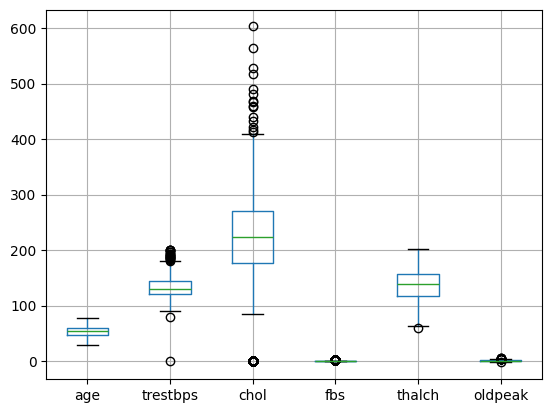

In [136]:
#boxplot for outliers
features.boxplot()

In [137]:
##outlier capping
def outlier_capping(df2, col):
    Q1, Q3 = df2[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5  * IQR
    df2[col] = df2[col].clip(lower, upper)   # directly cap values using clip()

for col in features.select_dtypes(include=['int', 'float']).columns:
    outlier_capping(features, col)

<Axes: >

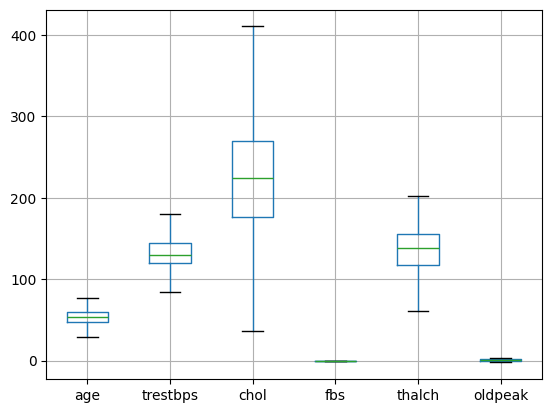

In [138]:
#after clipping outliers
features.boxplot()

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>],
       [<Axes: title={'center': 'thalch'}>,
        <Axes: title={'center': 'oldpeak'}>]], dtype=object)

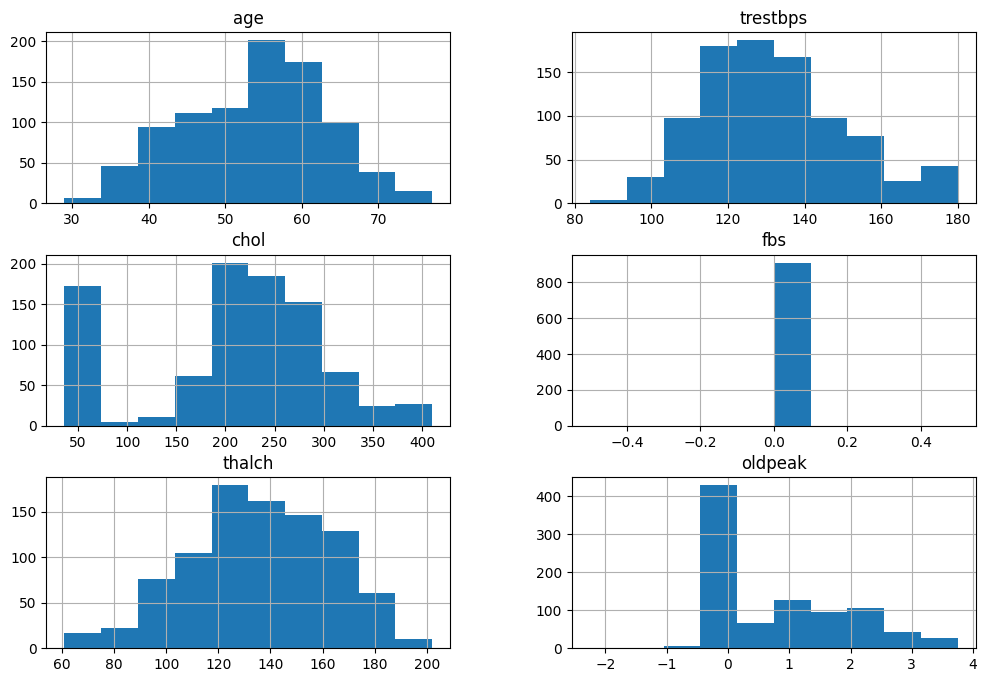

In [139]:
#Histogram plot distribution
features.hist(figsize=(12,8))

3. Feature Engineering:

If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.


In [140]:
#separating numerical and categorical columns
cat_col= [i for i in features.columns if features[i].dtype=='O']
num_col= [i for i in features.columns if features[i].dtype!='O']
print(cat_col)
print(num_col)

['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']
['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak']


In [141]:
#getting coorelation for numerical column
corr = df2[num_col].corr()

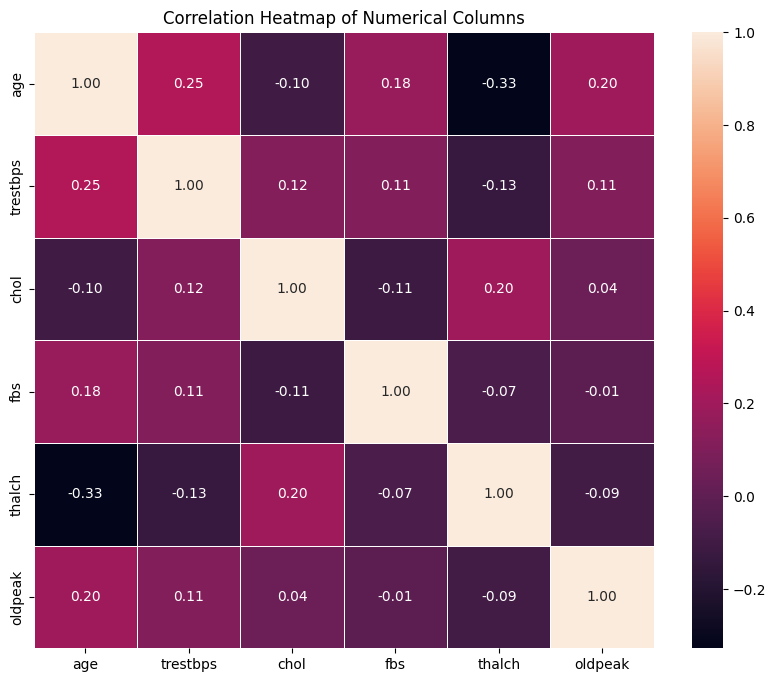

In [142]:
##use heatmap for correlation for numerical columns
plt.figure(figsize=(10, 8)) # Adjust figure size as needed
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

In [143]:
data1=features[num_col]
data2=features[cat_col]
data1.columns

Index(['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak'], dtype='object')

<Axes: >

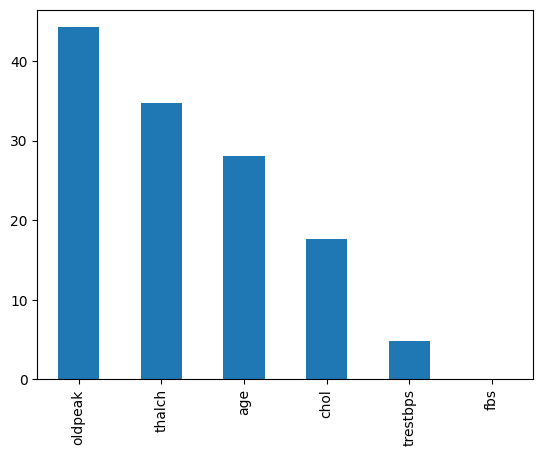

In [144]:
#for feature selection we using f_classif (ANOVA F-value)
from sklearn.feature_selection import f_classif #here, we used ANoVA for getting numerical features
f_cla=f_classif(data1,target)
pd.Series(f_cla[0],index=data1.columns).sort_values(ascending=False).plot(kind='bar')

In [145]:
data1.drop(columns=['fbs'],inplace=True)
data1 #dropping fbs because No data  distributed in columns

,age,trestbps,chol,thalch,oldpeak
0,63,145,233.00,150,2.3
1,41,135,203.00,132,0.0
2,57,140,192.00,148,0.4
3,52,118,186.00,190,0.0
4,57,110,201.00,126,1.5
...,...,...,...,...,...
903,53,125,36.25,120,1.5
904,62,166,170.00,120,3.0
905,56,170,36.25,123,2.5
906,56,144,208.00,105,0.0


In [146]:
data1.drop(columns=['trestbps'],inplace=True)
data1 #dropping trestbps because low data  distributed in columns

,age,chol,thalch,oldpeak
0,63,233.00,150,2.3
1,41,203.00,132,0.0
2,57,192.00,148,0.4
3,52,186.00,190,0.0
4,57,201.00,126,1.5
...,...,...,...,...
903,53,36.25,120,1.5
904,62,170.00,120,3.0
905,56,36.25,123,2.5
906,56,208.00,105,0.0


In [147]:
data2.columns

Index(['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

In [148]:
data2.head()

,sex,cp,restecg,exang,slope,thal
0,Male,typical angina,lv hypertrophy,False,downsloping,fixed defect
1,Male,atypical angina,normal,False,flat,fixed defect
2,Male,asymptomatic,normal,False,flat,fixed defect
3,Male,typical angina,lv hypertrophy,False,flat,fixed defect
4,Male,asymptomatic,normal,True,flat,fixed defect


In [149]:
data2.drop(columns=['exang'],inplace=True) # we dropping exang because we can't encode boolean datatype
data2.head()

,sex,cp,restecg,slope,thal
0,Male,typical angina,lv hypertrophy,downsloping,fixed defect
1,Male,atypical angina,normal,flat,fixed defect
2,Male,asymptomatic,normal,flat,fixed defect
3,Male,typical angina,lv hypertrophy,flat,fixed defect
4,Male,asymptomatic,normal,flat,fixed defect


In [150]:
ord_enc=OrdinalEncoder()
data2=pd.DataFrame(ord_enc.fit_transform(data2),columns=data2.columns)
data2.head()

,sex,cp,restecg,slope,thal
0,1.0,3.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0.0
2,1.0,0.0,1.0,1.0,0.0
3,1.0,3.0,0.0,1.0,0.0
4,1.0,0.0,1.0,1.0,0.0


In [151]:
from sklearn.feature_selection import chi2 #for categorical feature selection

<Axes: >

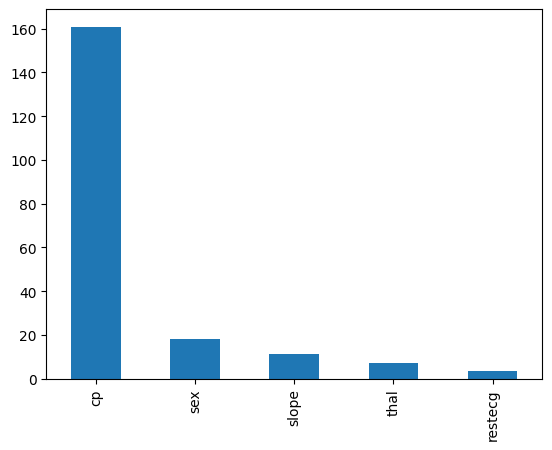

In [152]:
chi=chi2(data2,target)
pd.Series(chi[0],index=data2.columns).sort_values(ascending=False).plot(kind='bar')

In [33]:
data2.drop(columns=['restecg','thal'],inplace=True) #dropping because of low distribution
data2

,sex,cp,slope
0,1.0,3.0,0.0
1,1.0,1.0,1.0
2,1.0,0.0,1.0
3,1.0,3.0,1.0
4,1.0,0.0,1.0
...,...,...,...
902,1.0,0.0,2.0
903,1.0,0.0,1.0
904,1.0,2.0,0.0
905,1.0,2.0,0.0


In [153]:
data1.head()

,age,chol,thalch,oldpeak
0,63,233.0,150,2.3
1,41,203.0,132,0.0
2,57,192.0,148,0.4
3,52,186.0,190,0.0
4,57,201.0,126,1.5


In [155]:
sta_scl=StandardScaler() #apply scaling for numerical data
data1=pd.DataFrame(sta_scl.fit_transform(data1),columns=data1.columns)
data1.head()

,age,chol,thalch,oldpeak
0,1.006097,0.265386,0.523305,1.416352
1,-1.396447,-0.043590,-0.148458,-0.787132
2,0.350858,-0.156881,0.448665,-0.403917
3,-0.195175,-0.218677,2.016110,-0.787132
4,0.350858,-0.064188,-0.372378,0.649923


In [156]:
New_feature=pd.concat([data1,data2],axis=1) #concating numerical and categorical data
New_feature

,age,chol,thalch,oldpeak,sex,cp,restecg,slope,thal
0,1.006097,0.265386,0.523305,1.416352,1.0,3.0,0.0,0.0,0.0
1,-1.396447,-0.043590,-0.148458,-0.787132,1.0,1.0,1.0,1.0,0.0
2,0.350858,-0.156881,0.448665,-0.403917,1.0,0.0,1.0,1.0,0.0
3,-0.195175,-0.218677,2.016110,-0.787132,1.0,3.0,0.0,1.0,0.0
4,0.350858,-0.064188,-0.372378,0.649923,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
902,-0.085969,-1.760984,-0.596299,0.649923,1.0,0.0,1.0,2.0,1.0
903,0.896890,-0.383464,-0.596299,2.086977,1.0,0.0,2.0,1.0,2.0
904,0.241651,-1.760984,-0.484339,1.607959,1.0,2.0,0.0,0.0,2.0
905,0.241651,0.007906,-1.156101,-0.787132,1.0,2.0,2.0,0.0,2.0


4. Decision Tree Classification:


Split the dataset into training and testing sets (e.g., using an 80-20 split).
Implement a Decision Tree Classification model using a library like scikit-learn.
Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).


In [157]:
X_train,X_test,Y_train,Y_test=train_test_split(New_feature,target,train_size=0.80,random_state=100) #splliting the dataset into train , test
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(725, 9)
(182, 9)
(725, 1)
(182, 1)


In [159]:
D_tree_class=DecisionTreeClassifier(criterion='gini',max_depth=6,splitter='best')
D_tree_class #We using gini impurity method and max_depth 6 with best split

DecisionTreeClassifier(max_depth=6)

In [161]:
D_tree_class.fit(X_train,Y_train)
Y_pred=D_tree_class.predict(X_test) #after train we geting Y_pred by trained data
Y_pred

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 3, 2, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 2,
       0, 3, 3, 3, 0, 2, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 2, 2, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 3, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 3, 0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 2, 1, 0, 1, 1, 1, 0, 0, 3, 1, 1, 0, 3, 0, 0, 0, 2, 1, 1, 0,
       1, 1, 1, 2, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 3, 0, 1,
       2, 0, 1, 1, 1, 2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 2, 2, 2])

In [162]:
from sklearn.metrics import accuracy_score #for getting accuracy

In [164]:
accuracy_score(Y_test,Y_pred) #Accuracy=54%

0.5439560439560439

Hyperparameter Tuning:

Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.

In [165]:
params={'criterion':['entropy','gini'],'max_depth': range(1,10),'splitter':['best','random']} #hyperpara meter tunning

In [43]:
grid_search=GridSearchCV(D_tree_class,params) #in that we get gini impurity, max_depth =4, splitter= random
grid_search.fit(X_train,Y_train)
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 4, 'splitter': 'random'}

In [44]:
D_tree_class1=DecisionTreeClassifier(criterion='gini',max_depth=2,splitter='random') #again training after hyperparameter tunning

In [166]:
D_tree_class1.fit(X_train,Y_train)
Y_pred=D_tree_class1.predict(X_test)

In [167]:
accuracy_score(Y_test,Y_pred) #Now we got accuracy 51% so old train is best

0.5164835164835165

6. Model Evaluation and Analysis:


Analyse the performance of the Decision Tree model using the evaluation metrics obtained.
Visualize the decision tree structure to understand the rules learned by the model and identify important features


In [168]:
from sklearn.metrics import f1_score, confusion_matrix,roc_curve,roc_auc_score, precision_score, classification_report, auc

In [170]:
con=confusion_matrix(Y_test,Y_pred) #getting confusion matrix
con

array([[55, 29,  0,  1,  0],
       [15, 32,  0,  2,  0],
       [ 5, 17,  0,  0,  0],
       [ 1, 14,  0,  7,  0],
       [ 0,  4,  0,  0,  0]])

In [172]:
n=classification_report(Y_test,Y_pred)
print(n) #getting report about Precision, recall, f1-score, support

              precision    recall  f1-score   support

           0       0.72      0.65      0.68        85
           1       0.33      0.65      0.44        49
           2       0.00      0.00      0.00        22
           3       0.70      0.32      0.44        22
           4       0.00      0.00      0.00         4

    accuracy                           0.52       182
   macro avg       0.35      0.32      0.31       182
weighted avg       0.51      0.52      0.49       182



In [173]:
S_value=D_tree_class.predict_proba(X_test)[:,1]
S_value #getting predicted _probability

array([0.        , 0.39583333, 0.01149425, 0.6       , 0.6       ,
       0.05263158, 0.01149425, 0.39285714, 0.39285714, 0.55555556,
       0.19354839, 0.        , 0.49579832, 0.01149425, 0.01149425,
       0.11904762, 0.01149425, 1.        , 0.26315789, 0.85714286,
       0.        , 0.39583333, 0.19148936, 0.19148936, 0.05263158,
       0.19148936, 0.6       , 0.26666667, 0.        , 0.6       ,
       0.05263158, 0.76923077, 0.05263158, 0.39285714, 0.76923077,
       0.76923077, 0.55555556, 0.01149425, 0.49579832, 0.01149425,
       0.19148936, 0.39583333, 0.39583333, 0.19354839, 0.05555556,
       0.26666667, 0.26666667, 0.        , 0.14285714, 0.19354839,
       0.49579832, 0.11904762, 0.55555556, 0.76923077, 0.49579832,
       0.01149425, 0.49579832, 0.05263158, 0.76923077, 0.01149425,
       0.19354839, 0.        , 0.26315789, 0.39583333, 0.39285714,
       0.01149425, 0.49579832, 0.49579832, 0.        , 0.05555556,
       0.43478261, 0.39583333, 0.05263158, 0.11904762, 0.11904

In [174]:
from sklearn.preprocessing import label_binarize

In [175]:
y_test_bin = label_binarize(Y_test, classes=[0,1,2,3,4])
y_pred_proba = D_tree_class.predict_proba(X_test)  # shape: (n_samples, n_classes)

# Compute ROC AUC score (macro average)
roc_auc = roc_auc_score(y_test_bin, y_pred_proba, multi_class='ovr', average='macro')
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.6931282575323484


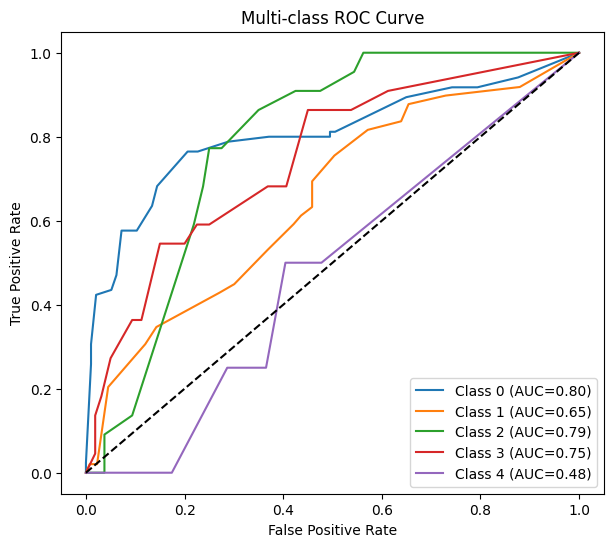

In [176]:
plt.figure(figsize=(7,6)) #plotting ROC curve
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f"Class {i} (AUC={auc(fpr,tpr):.2f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("Multi-class ROC Curve"); plt.legend(); plt.show()

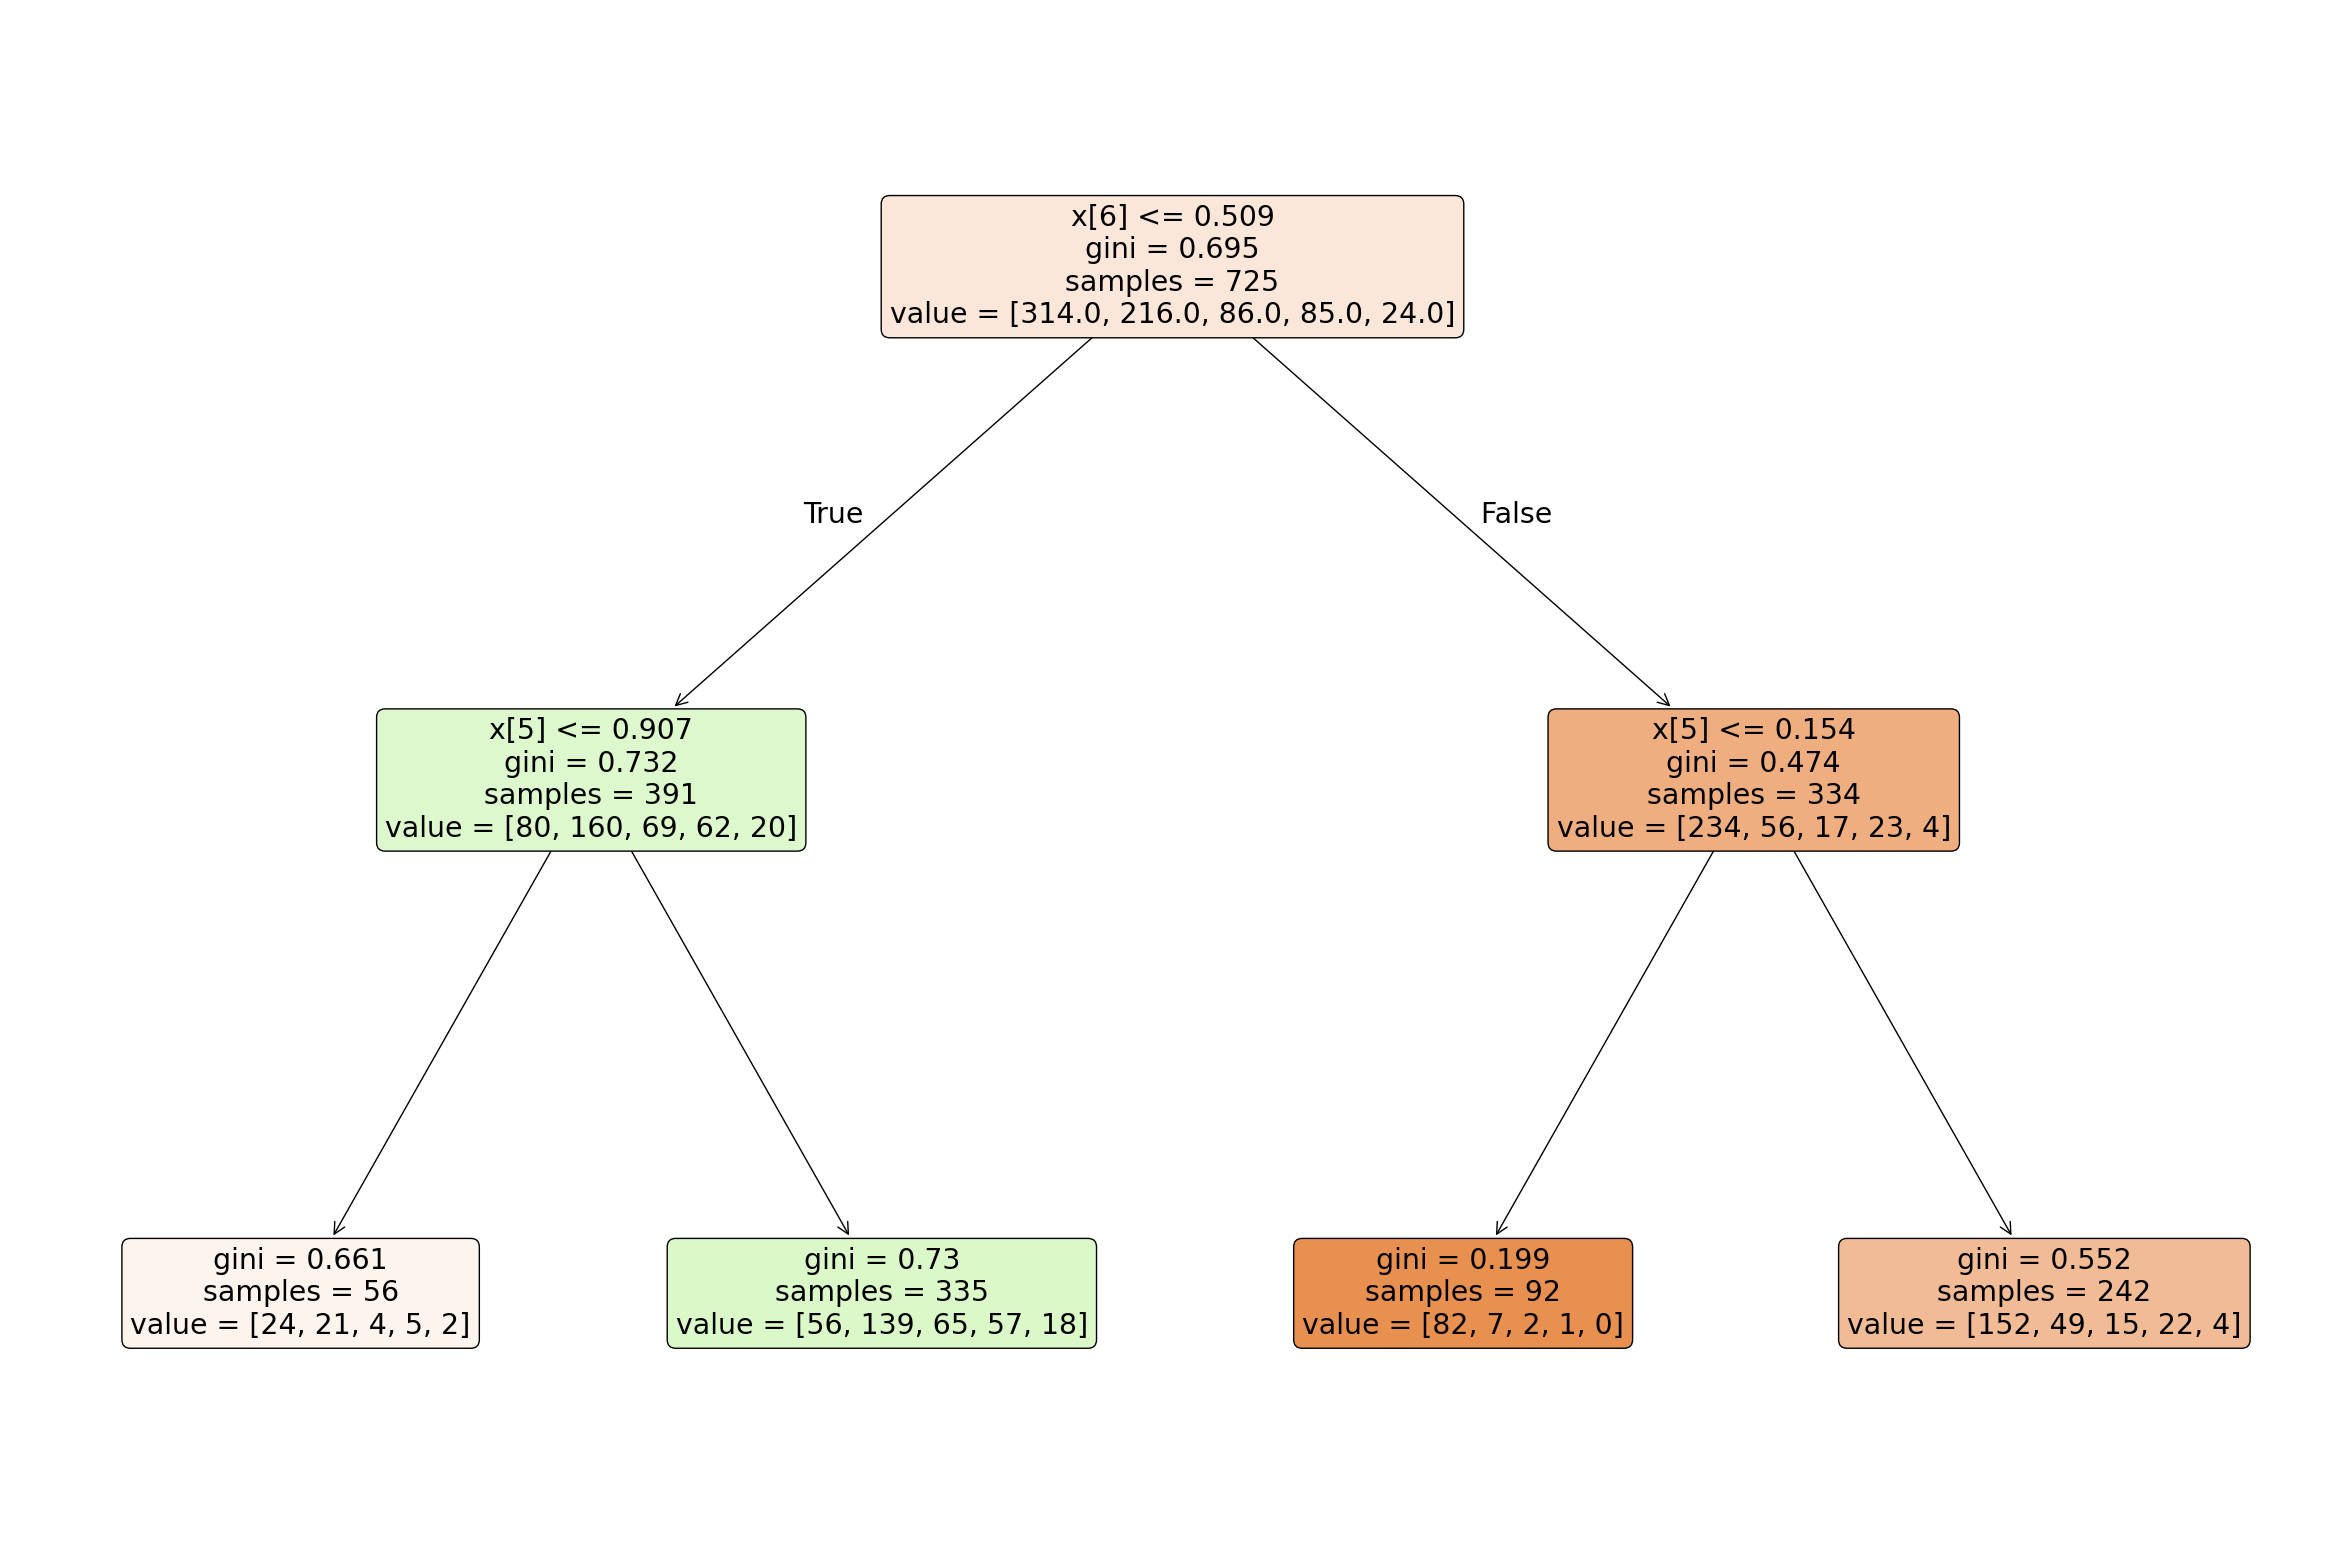

In [54]:
plt.figure(figsize=(30,20))
plot_tree(D_tree_class1,filled=True,rounded=True); ##plotting hypermater report

Interview Questions:


1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?



In [179]:
''''Common decision tree hyperparameters include max_depth (maximum tree depth),
min_samples_split (minimum samples for a split),
max_features (number of features to consider), and criterion (split quality metric).
These settings control the tree's complexity, impacting its ability to learn from data while preventing overfitting (performing well on training data but poorly on new data)
and underfitting (failing to capture complex patterns).  '''

"'Common decision tree hyperparameters include max_depth (maximum tree depth), \nmin_samples_split (minimum samples for a split), min_samples_leaf (minimum samples in a leaf), \nmax_features (number of features to consider), and criterion (split quality metric). \nThese settings control the tree's complexity, impacting its ability to learn from data while preventing overfitting (performing well on training data but poorly on new data) \nand underfitting (failing to capture complex patterns).  "

2. What is the difference between the Label encoding and One-hot encoding?

In [180]:
''' label encoding: Converts each category into a single, distinct integer number.
one hot encoding: Creates a new binary column for each unique category,
with a '1' indicating the presence of that category and '0' otherwise.

Label Encoding assigns a unique number to each category (e.g., 'Red' = 1, 'Blue' = 2),
while One-Hot Encoding creates a new binary (0/1) column for each category (e.g., 'Red' column, 'Blue' column)

Label encoding used for ordinal data wherease one hot encoding used for nominal data.'''

" label encoding: Converts each category into a single, distinct integer number. \none hot encoding: Creates a new binary column for each unique category, \nwith a '1' indicating the presence of that category and '0' otherwise. \n\nLabel Encoding assigns a unique number to each category (e.g., 'Red' = 1, 'Blue' = 2),\nwhile One-Hot Encoding creates a new binary (0/1) column for each category (e.g., 'Red' column, 'Blue' column)\n\nLabel encoding used for ordinal data wherease one hot encoding used for nominal data."